In [1]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Imports

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from keras import models
from keras import layers
from keras import callbacks

In [2]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!ls -l

total 8
-rw-r--r-- 1 root root   63 Apr  3 08:48 kaggle.json
drwxr-xr-x 1 root root 4096 Mar 25 13:38 sample_data


In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [6]:
!ls -l

total 8
-rw-r--r-- 1 root root   63 Apr  3 08:48 kaggle.json
drwxr-xr-x 1 root root 4096 Mar 25 13:38 sample_data


In [7]:
!kaggle datasets download -d hellbuoy/car-price-prediction

  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 6.85MB/s]


In [8]:
!ls -l

total 28
-rw-r--r-- 1 root root 18523 Apr  3 08:48 car-price-prediction.zip
-rw-r--r-- 1 root root    63 Apr  3 08:48 kaggle.json
drwxr-xr-x 1 root root  4096 Mar 25 13:38 sample_data


In [9]:
!unzip car-price-prediction.zip

Archive:  car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


In [10]:
!ls -l

total 72
-rw-r--r-- 1 root root 26717 Oct 15  2019  CarPrice_Assignment.csv
-rw-r--r-- 1 root root 18523 Apr  3 08:48  car-price-prediction.zip
-rw-r--r-- 1 root root 14884 Oct 15  2019 'Data Dictionary - carprices.xlsx'
-rw-r--r-- 1 root root    63 Apr  3 08:48  kaggle.json
drwxr-xr-x 1 root root  4096 Mar 25 13:38  sample_data


In [11]:
# Import the dataset into pandas dataframe
df_alldata = pd.read_csv('CarPrice_Assignment.csv')

In [12]:
# Explore Data

In [13]:
df_alldata.shape

(205, 26)

In [14]:
df_alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [15]:
df_alldata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
# Cleaning Data

In [17]:
df_alldata.duplicated(subset = ['car_ID']).sum()

0

In [18]:
df_alldata = df_alldata.drop(['car_ID'], axis =1)

In [19]:
df_alldata.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
df_alldata.shape

(205, 25)

In [21]:
df_alldata.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [22]:
df_alldata['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [23]:
df_alldata['CarName'].value_counts()

toyota corona                6
peugeot 504                  6
toyota corolla               6
subaru dl                    4
toyota mark ii               3
                            ..
toyouta tercel               1
dodge coronet custom (sw)    1
vw rabbit                    1
dodge colt (sw)              1
buick skyhawk                1
Name: CarName, Length: 147, dtype: int64

In [24]:
df_alldata['car_company'] = df_alldata['CarName'].apply(lambda x:x.split(' ')[0])

In [25]:
df_alldata.shape

(205, 26)

In [26]:
df_alldata.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [27]:
df_alldata = df_alldata.drop(['CarName'], axis =1)

In [28]:
df_alldata.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [29]:
df_alldata['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
maxda           2
vw              2
porcshce        1
vokswagen       1
mercury         1
Nissan          1
toyouta         1
Name: car_company, dtype: int64

In [30]:
df_alldata['car_company'].replace('toyouta', 'toyota',inplace=True)
df_alldata['car_company'].replace('Nissan', 'nissan',inplace=True)
df_alldata['car_company'].replace('maxda', 'mazda',inplace=True)
df_alldata['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
df_alldata['car_company'].replace('vw', 'volkswagen',inplace=True)
df_alldata['car_company'].replace('porcshce', 'porsche',inplace=True)

In [31]:
df_alldata['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [32]:
df_alldata['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [33]:
df_alldata['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [34]:
df_alldata['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [35]:
def tonumber(x):
    return x.map({'four':4, 'two': 2})
    
df_alldata['doornumber'] = df_alldata[['doornumber']].apply(tonumber)

In [36]:
df_alldata['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [37]:
df_alldata['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [38]:
df_alldata['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [39]:
df_alldata['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [40]:
df_alldata['wheelbase'].value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
98.4      7
97.3      7
96.3      6
107.9     6
98.8      6
99.1      6
104.3     6
100.4     6
93.1      5
97.2      5
102.4     5
109.1     5
95.9      5
101.2     4
97.0      4
114.2     4
95.3      4
105.8     3
103.5     3
110.0     3
89.5      3
99.8      2
86.6      2
113.0     2
104.5     2
104.9     2
88.6      2
96.9      2
91.3      2
115.6     2
102.9     2
96.1      2
103.3     2
112.0     1
99.5      1
88.4      1
99.2      1
96.0      1
102.0     1
106.7     1
93.0      1
99.4      1
93.3      1
102.7     1
120.9     1
95.1      1
96.6      1
94.3      1
108.0     1
Name: wheelbase, dtype: int64

In [41]:
df_alldata['carlength'].value_counts()

157.3    15
188.8    11
166.3     7
171.7     7
186.7     7
         ..
157.9     1
177.3     1
175.7     1
193.8     1
183.1     1
Name: carlength, Length: 75, dtype: int64

In [42]:
df_alldata['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [43]:
df_alldata['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [44]:
def cylndrtonumber(x):
    return x.map({'four':4, 'two': 2, 'six': 6, 'five': 5, 'eight': 8, 'twelve': 12, 'three': 3})
    
df_alldata['cylindernumber'] = df_alldata[['cylindernumber']].apply(cylndrtonumber)

In [45]:
df_alldata['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

In [46]:
df_alldata['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

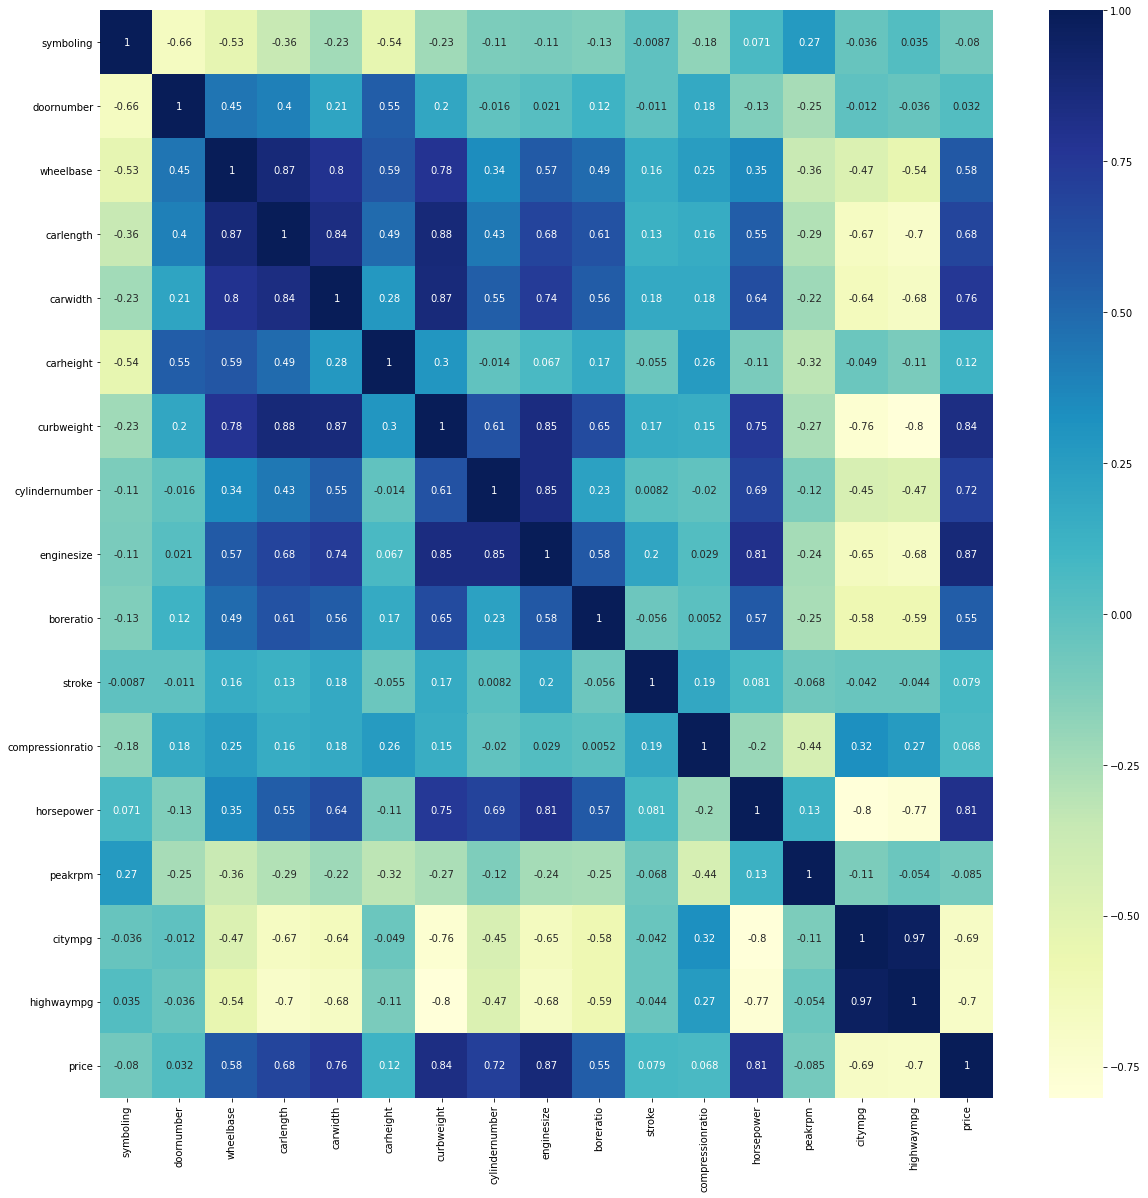

In [47]:
plt.figure(figsize = (20,20))
sns.heatmap(df_alldata.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [48]:
df_alldata_numeric = df_alldata.select_dtypes(include =['int64','float64'])
df_alldata_numeric.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 2160x2160 with 0 Axes>

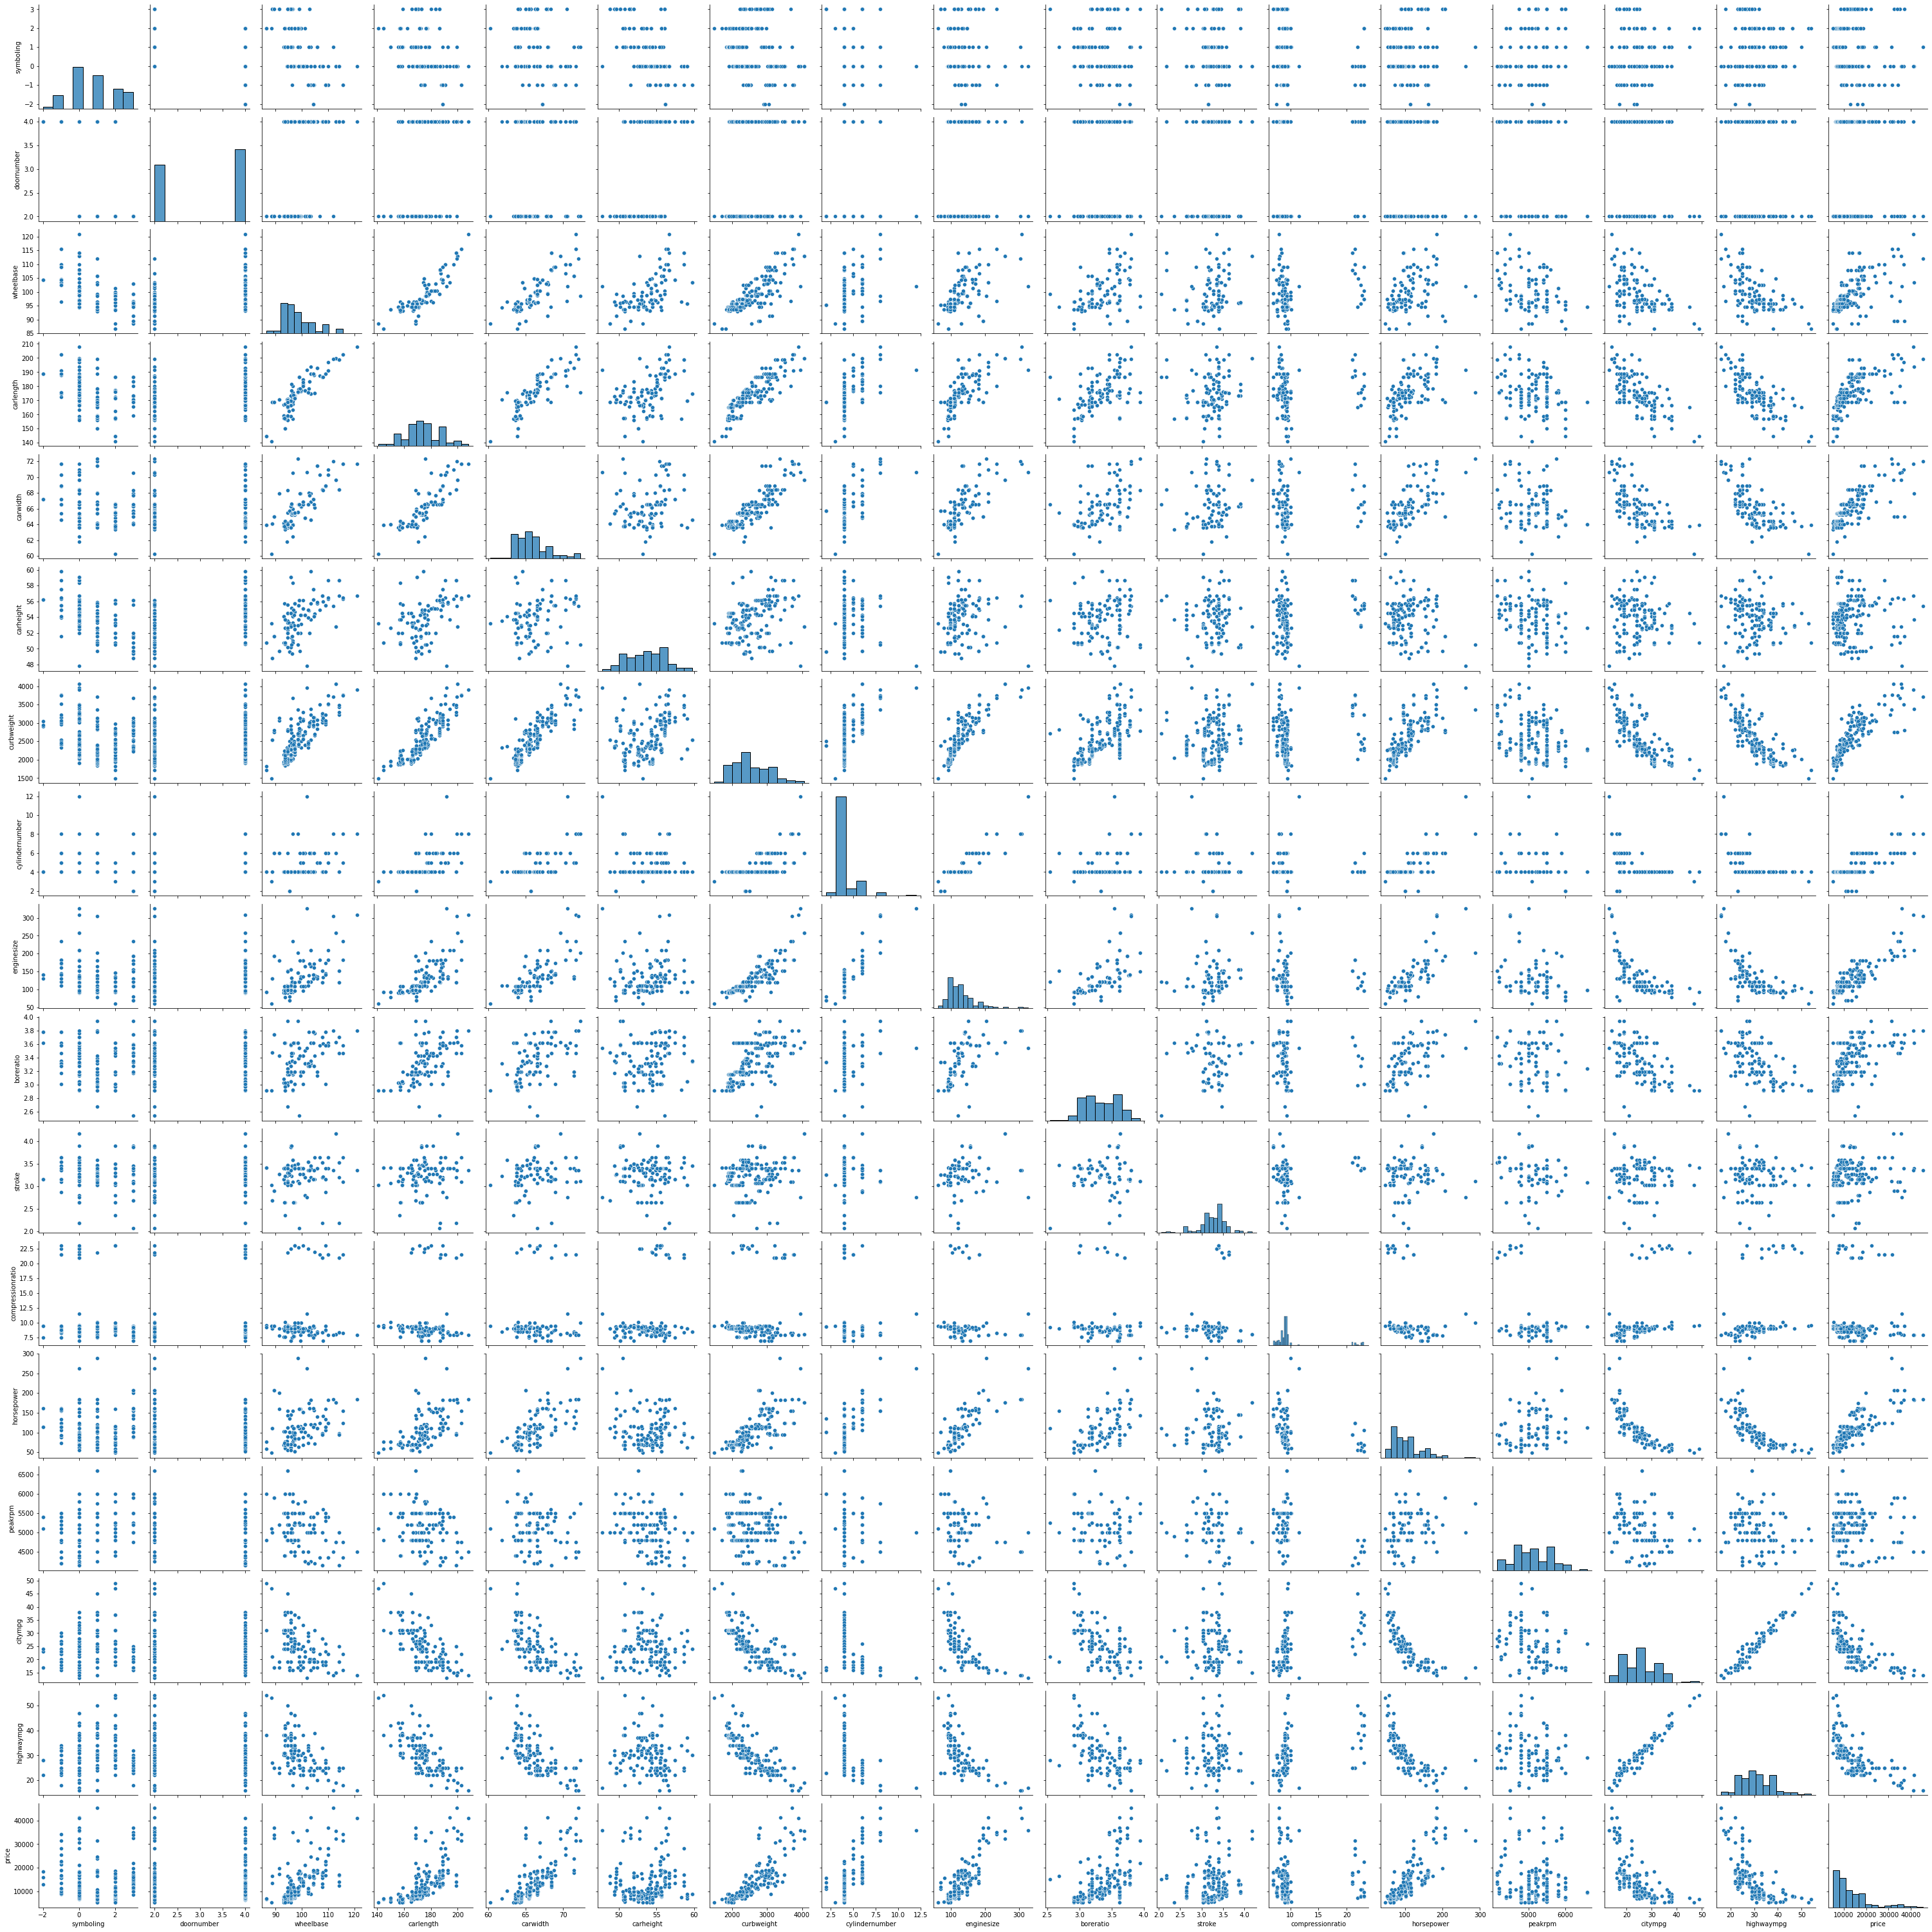

In [49]:
plt.figure(figsize = (30,30))
sns.pairplot(df_alldata_numeric)
plt.show()

In [50]:
categorical_cols = df_alldata.select_dtypes(include = ['object'])
categorical_cols.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [51]:
categorical_cols.shape

(205, 8)

In [52]:
#creating dummies
cars_dummies = pd.get_dummies(categorical_cols)
cars_dummies.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
cars_dummies.shape

(205, 51)

In [54]:
cars_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   fueltype_diesel          205 non-null    uint8
 1   fueltype_gas             205 non-null    uint8
 2   aspiration_std           205 non-null    uint8
 3   aspiration_turbo         205 non-null    uint8
 4   carbody_convertible      205 non-null    uint8
 5   carbody_hardtop          205 non-null    uint8
 6   carbody_hatchback        205 non-null    uint8
 7   carbody_sedan            205 non-null    uint8
 8   carbody_wagon            205 non-null    uint8
 9   drivewheel_4wd           205 non-null    uint8
 10  drivewheel_fwd           205 non-null    uint8
 11  drivewheel_rwd           205 non-null    uint8
 12  enginelocation_front     205 non-null    uint8
 13  enginelocation_rear      205 non-null    uint8
 14  enginetype_dohc          205 non-null    uint8
 15  engine

In [55]:
car_df  = pd.concat([df_alldata, cars_dummies], axis =1)

In [56]:
car_df.shape

(205, 76)

In [57]:
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
car_df = car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'car_company'], axis =1)

In [59]:
car_df.shape

(205, 68)

In [60]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 68 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   doornumber               205 non-null    int64  
 2   wheelbase                205 non-null    float64
 3   carlength                205 non-null    float64
 4   carwidth                 205 non-null    float64
 5   carheight                205 non-null    float64
 6   curbweight               205 non-null    int64  
 7   cylindernumber           205 non-null    int64  
 8   enginesize               205 non-null    int64  
 9   boreratio                205 non-null    float64
 10  stroke                   205 non-null    float64
 11  compressionratio         205 non-null    float64
 12  horsepower               205 non-null    int64  
 13  peakrpm                  205 non-null    int64  
 14  citympg                  2

In [61]:
train_dataset = car_df.sample(frac = 0.7, random_state = 100)

In [62]:
train_dataset.shape

(144, 68)

In [63]:
train_dataset.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
160,0,4,95.7,166.3,64.4,53.0,2094,4,98,3.19,3.03,9.0,70,4800,38,47,7738.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
186,2,4,97.3,171.7,65.5,55.7,2275,4,109,3.19,3.40,9.0,85,5250,27,34,8495.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59,1,2,98.8,177.8,66.5,53.7,2385,4,122,3.39,3.39,8.6,84,4800,26,32,8845.0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
165,1,2,94.5,168.7,64.0,52.6,2265,4,98,3.24,3.08,9.4,112,6600,26,29,9298.0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,2,2,93.3,157.3,63.8,55.7,2240,4,108,3.62,2.64,8.7,73,4400,26,31,7603.0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [64]:
test_dataset = car_df.drop(train_dataset.index)

In [65]:
test_dataset.shape

(61, 68)

In [66]:
test_dataset.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,4,105.8,192.7,71.4,55.9,3086,5,131,3.13,3.40,8.3,140,5500,17,20,23875.0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,0,4,101.2,176.8,64.8,54.3,2765,6,164,3.31,3.19,9.0,121,4250,21,28,21105.0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,1,4,103.5,189.0,66.9,55.7,3055,6,164,3.31,3.19,9.0,121,4250,20,25,24565.0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
train_labels = train_dataset.pop('price')

In [68]:
train_dataset.shape

(144, 67)

In [69]:
test_labels = test_dataset.pop('price')

In [70]:
train_labels.head()

160    7738.0
186    8495.0
59     8845.0
165    9298.0
140    7603.0
Name: price, dtype: float64

In [71]:
test_labels.head()

2     16500.0
4     17450.0
8     23875.0
13    21105.0
14    24565.0
Name: price, dtype: float64

In [72]:
train_stats = train_dataset.describe()

In [73]:
train_stats

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.00000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.868056,3.055556,98.539583,173.401389,65.739583,53.736111,2515.416667,4.277778,124.833333,3.331597,3.256597,10.038958,102.12500,5140.972222,25.486111,30.958333,0.090278,0.909722,0.819444,0.180556,0.034722,0.048611,0.354167,0.444444,0.118056,0.041667,0.590278,0.368056,0.979167,0.020833,0.062500,0.0,0.048611,0.763889,0.069444,0.041667,0.013889,0.055556,0.340278,0.013889,0.090278,0.006944,0.444444,0.041667,0.006944,0.013889,0.034722,0.034722,0.034722,0.013889,0.048611,0.069444,0.027778,0.006944,0.069444,0.006944,0.062500,0.069444,0.048611,0.041667,0.027778,0.006944,0.020833,0.048611,0.180556,0.069444,0.062500
std,1.296831,1.001941,5.959458,12.054352,2.022331,2.425869,493.329285,0.848235,39.231606,0.280067,0.305792,3.844431,36.42386,487.416939,6.265664,6.554639,0.287580,0.287580,0.385992,0.385992,0.183714,0.215804,0.479929,0.498638,0.323800,0.200524,0.493499,0.483960,0.143325,0.143325,0.242906,0.0,0.215804,0.426174,0.255096,0.200524,0.117438,0.229861,0.475456,0.117438,0.287580,0.083333,0.498638,0.200524,0.083333,0.117438,0.183714,0.183714,0.183714,0.117438,0.215804,0.255096,0.164909,0.083333,0.255096,0.083333,0.242906,0.255096,0.215804,0.200524,0.164909,0.083333,0.143325,0.215804,0.385992,0.255096,0.242906
min,-2.000000,2.000000,86.600000,144.600000,61.800000,48.800000,1819.000000,2.000000,70.000000,2.540000,2.070000,7.000000,52.00000,4150.000000,14.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,94.500000,166.300000,64.000000,52.000000,2128.000000,4.000000,97.000000,3.145000,3.110000,8.600000,70.00000,4800.000000,19.750000,25.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0

In [74]:
train_stats = train_stats.transpose()

In [75]:
train_stats

,count,mean,std,min,25%,50%,75%,max
symboling,144.0,0.868056,1.296831,-2.0,0.0,1.0,2.00,3.0
doornumber,144.0,3.055556,1.001941,2.0,2.0,4.0,4.00,4.0
wheelbase,144.0,98.539583,5.959458,86.6,94.5,96.5,102.40,120.9
carlength,144.0,173.401389,12.054352,144.6,166.3,172.5,178.25,208.1
carwidth,144.0,65.739583,2.022331,61.8,64.0,65.4,66.50,72.0
...,...,...,...,...,...,...,...,...
car_company_saab,144.0,0.020833,0.143325,0.0,0.0,0.0,0.00,1.0
car_company_subaru,144.0,0.048611,0.215804,0.0,0.0,0.0,0.00,1.0
car_company_toyota,144.0,0.180556,0.385992,0.0,0.0,0.0,0.00,1.0
car_company_volkswagen,144.0,0.069444,0.255096,0.0,0.0,0.0,0.00,1.0


In [76]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [77]:
train_dataset.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
160,0,4,95.7,166.3,64.4,53.0,2094,4,98,3.19,3.03,9.0,70,4800,38,47,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
186,2,4,97.3,171.7,65.5,55.7,2275,4,109,3.19,3.40,9.0,85,5250,27,34,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59,1,2,98.8,177.8,66.5,53.7,2385,4,122,3.39,3.39,8.6,84,4800,26,32,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
165,1,2,94.5,168.7,64.0,52.6,2265,4,98,3.24,3.08,9.4,112,6600,26,29,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,2,2,93.3,157.3,63.8,55.7,2240,4,108,3.62,2.64,8.7,73,4400,26,31,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [78]:
normed_train_dataset = norm(train_dataset)

In [79]:
normed_train_dataset.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
160,-0.669367,0.942615,-0.476484,-0.589114,-0.662396,-0.303442,-0.854230,-0.327477,-0.683972,-0.505584,-0.741017,-0.270250,-0.881977,-0.699549,1.997217,2.447376,-0.313923,0.313923,0.46777,-0.46777,-0.189001,-0.225256,-0.737956,1.114145,-0.364594,-0.207789,0.830239,-0.760508,0.145358,-0.145358,-0.257301,NaN,-0.225256,0.554026,-0.272229,-0.207789,-0.118265,-0.241692,1.387556,-0.118265,-0.313923,-0.083333,-0.891316,-0.207789,-0.083333,-0.118265,-0.189001,-0.189001,-0.189001,-0.118265,-0.225256,-0.272229,-0.168443,-0.083333,-0.272229,-0.083333,-0.257301,-0.272229,-0.225256,-0.207789,-0.168443,-0.083333,-0.145358,-0.225256,2.122957,-0.272229,-0.257301
186,0.872855,0.942615,-0.208003,-0.141143,-0.118469,0.809561,-0.487335,-0.327477,-0.403586,-0.505584,0.468955,-0.270250,-0.470159,0.223685,0.241617,0.464048,-0.313923,0.313923,0.46777,-0.46777,-0.189001,-0.225256,-0.737956,1.114145,-0.364594,-0.207789,0.830239,-0.760508,0.145358,-0.145358,-0.257301,NaN,-0.225256,0.554026,-0.272229,-0.207789,-0.118265,-0.241692,-0.715687,-0.118265,-0.313923,-0.083333,1.114145,-0.207789,-0.083333,-0.118265,-0.189001,-0.189001,-0.189001,-0.118265,-0.225256,-0.272229,-0.168443,-0.083333,-0.272229,-0.083333,-0.257301,-0.272229,-0.225256,-0.207789,-0.168443,-0.083333,-0.145358,-0.225256,-0.467770,3.647868,-0.257301
59,0.101744,-1.053511,0.043698,0.364898,0.376010,-0.014886,-0.264360,-0.327477,-0.072221,0.208532,0.436253,-0.374297,-0.497613,-0.699549,0.082017,0.158921,-0.313923,0.313923,0.46777,-0.46777,-0.189001,-0.225256,1.345684,-0.891316,-0.364594,-0.207789,0.830239,-0.760508,0.145358,-0.145358,-0.257301,NaN,-0.225256,0.554026,-0.272229,-0.207789,-0.118265,-0.241692,1.387556,-0.118265,-0.313923,-0.083333,-0.891316,-0.207789,-0.083333,-0.118265,-0.189001,-0.189001,-0.189001,-0.118265,-0.225256,-0.272229,-0.168443,-0.083333,3.647868,-0.083333,-0.257301,-0.272229,-0.225256,-0.207789,-0.168443,-0.083333,-0.145358,-0.225256,-0.467770,-0.272229,-0.257301
165,0.101744,-1.053511,-0.677844,-0.390016,-0.860187,-0.468332,-0.507606,-0.327477,-0.683972,-0.327055,-0.577507,-0.166204,0.271113,2.993388,0.082017,-0.298771,-0.313923,0.313923,0.46777,-0.46777,-0.189001,-0.225256,-0.737956,1.114145,-0.364594,-0.207789,-1.196108,1.305779,0.145358,-0.145358,3.859512,NaN,-0.225256,-1.792436,-0.272229,-0.207789,-0.118265,-0.241692,-0.715687,-0.118265,-0.313923,-0.083333,1.114145,-0.207789,-0.083333,-0.118265,-0.189001,-0.189001,-0.189001,-0.118265,-0.225256,-0.272229,-0.168443,-0.083333,-0.272229,-0.083333,-0.257301,-0.272229,-0.225256,-0.207789,-0.168443,-0.083333,-0.145358,-0.225256,2.122957,-0.272229,-0.257301
140,0.872855,-1.053511,-0.879205,-1.335732,-0.959083,0.809561,-0.558282,-0.327477,-0.429076,1.029765,-2.016392,-0.348285,-0.799613,-1.520202,0.082017,0.006357,-0.313923,0.313923,0.46777,-0.46777,-0.189001,-0.225256,1.345684,-0.891316,-0.364594,4.779150,-1.196108,-0.760508,0.145358,-0.145358,-0.257301,NaN,-0.225256,-1.792436,3.6

In [80]:
normed_test_dataset = norm(test_dataset)

In [81]:
normed_test_dataset.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
2,0.101744,-1.053511,-0.677844,-0.182622,-0.118469,-0.550776,0.623485,2.030360,0.692469,-2.326580,0.697868,-0.270250,1.424204,-0.289223,-1.035183,-0.756462,-0.313923,0.313923,0.467770,-0.467770,-0.189001,-0.225256,1.345684,-0.891316,-0.364594,-0.207789,-1.196108,1.305779,0.145358,-0.145358,-0.257301,NaN,-0.225256,-1.792436,-0.272229,4.779150,-0.118265,-0.241692,-0.715687,-0.118265,-0.313923,-0.083333,1.114145,-0.207789,-0.083333,8.396841,-0.189001,-0.189001,-0.189001,-0.118265,-0.225256,-0.272229,-0.168443,-0.083333,-0.272229,-0.083333,-0.257301,-0.272229,-0.225256,-0.207789,-0.168443,-0.083333,-0.145358,-0.225256,-0.46777,-0.272229,-0.257301
4,0.872855,0.942615,0.144378,0.265349,0.326562,0.232448,0.625512,0.851441,0.284634,-0.505584,0.468955,-0.530367,0.353477,0.736593,-1.194783,-1.366717,-0.313923,0.313923,0.467770,-0.467770,-0.189001,-0.225256,-0.737956,1.114145,-0.364594,4.779150,-1.196108,-0.760508,0.145358,-0.145358,-0.257301,NaN,-0.225256,0.554026,-0.272229,-0.207789,-0.118265,-0.241692,-0.715687,-0.118265,-0.313923,-0.083333,1.114145,-0.207789,-0.083333,-0.118265,5.254231,-0.189001,-0.189001,-0.118265,-0.225256,-0.272229,-0.168443,-0.083333,-0.272229,-0.083333,-0.257301,-0.272229,-0.225256,-0.207789,-0.168443,-0.083333,-0.145358,-0.225256,-0.46777,-0.272229,-0.257301
8,0.101744,0.942615,1.218302,1.600966,2.798957,0.892006,1.156597,0.851441,0.157186,-0.719819,0.468955,-0.452332,1.039840,0.736593,-1.354383,-1.671844,-0.313923,0.313923,-2.122957,2.122957,-0.189001,-0.225256,-0.737956,1.114145,-0.364594,-0.207789,0.830239,-0.760508,0.145358,-0.145358,-0.257301,NaN,-0.225256,0.554026,-0.272229,-0.207789,-0.118265,-0.241692,-0.715687,-0.118265,-0.313923,-0.083333,1.114145,-0.207789,-0.083333,-0.118265,5.254231,-0.189001,-0.189001,-0.118265,-0.225256,-0.272229,-0.168443,-0.083333,-0.272229,-0.083333,-0.257301,-0.272229,-0.225256,-0.207789,-0.168443,-0.083333,-0.145358,-0.225256,-0.46777,-0.272229,-0.257301
13,-0.669367,0.942615,0.446419,0.281941,-0.464604,0.232448,0.505916,2.030360,0.998345,-0.077115,-0.217786,-0.270250,0.518204,-1.827947,-0.715983,-0.451334,-0.313923,0.313923,0.467770,-0.467770,-0.189001,-0.225256,-0.737956,1.114145,-0.364594,-0.207789,-1.196108,1.305779,0.145358,-0.145358,-0.257301,NaN,-0.225256,0.554026,-0.272229,-0.207789,-0.118265,-0.241692,-0.715687,-0.118265,-0.313923,-0.083333,1.114145,-0.207789,-0.083333,-0.118265,-0.189001,5.254231,-0.189001,-0.118265,-0.225256,-0.272229,-0.168443,-0.083333,-0.272229,-0.083333,-0.257301,-0.272229,-0.225256,-0.207789,-0.168443,-0.083333,-0.145358,-0.225256,-0.46777,-0.272229,-0.257301
14,0.101744,0.942615,0.832360,1.294023,0.573802,0.809561,1.093759,2.030360,0.998345,-0.077115,-0.217786,-0.270250,0.518204,-1.827947,-0.875583,-0.909025,-0.313923,0.313923,0.467770,-0.467770,-0.189001,-0.225256,-0.737956,1.114145,-0.364594,-0.207789,-1.196108,1.305779,0.145358,-0.145358,-0.257301,NaN,-0.225256,0.554026,-0.272229,-0.207789,-0.118

In [82]:
normed_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 160 to 78
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                144 non-null    float64
 1   doornumber               144 non-null    float64
 2   wheelbase                144 non-null    float64
 3   carlength                144 non-null    float64
 4   carwidth                 144 non-null    float64
 5   carheight                144 non-null    float64
 6   curbweight               144 non-null    float64
 7   cylindernumber           144 non-null    float64
 8   enginesize               144 non-null    float64
 9   boreratio                144 non-null    float64
 10  stroke                   144 non-null    float64
 11  compressionratio         144 non-null    float64
 12  horsepower               144 non-null    float64
 13  peakrpm                  144 non-null    float64
 14  citympg                  

In [83]:
normed_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 2 to 203
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                61 non-null     float64
 1   doornumber               61 non-null     float64
 2   wheelbase                61 non-null     float64
 3   carlength                61 non-null     float64
 4   carwidth                 61 non-null     float64
 5   carheight                61 non-null     float64
 6   curbweight               61 non-null     float64
 7   cylindernumber           61 non-null     float64
 8   enginesize               61 non-null     float64
 9   boreratio                61 non-null     float64
 10  stroke                   61 non-null     float64
 11  compressionratio         61 non-null     float64
 12  horsepower               61 non-null     float64
 13  peakrpm                  61 non-null     float64
 14  citympg                  61

In [84]:
normed_train_dataset = normed_train_dataset.drop(['enginetype_dohcv'], axis = 1)

In [85]:
normed_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 160 to 78
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                144 non-null    float64
 1   doornumber               144 non-null    float64
 2   wheelbase                144 non-null    float64
 3   carlength                144 non-null    float64
 4   carwidth                 144 non-null    float64
 5   carheight                144 non-null    float64
 6   curbweight               144 non-null    float64
 7   cylindernumber           144 non-null    float64
 8   enginesize               144 non-null    float64
 9   boreratio                144 non-null    float64
 10  stroke                   144 non-null    float64
 11  compressionratio         144 non-null    float64
 12  horsepower               144 non-null    float64
 13  peakrpm                  144 non-null    float64
 14  citympg                  

In [86]:
normed_test_dataset = normed_test_dataset.drop(['enginetype_dohcv'], axis = 1)

In [88]:
normed_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 2 to 203
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                61 non-null     float64
 1   doornumber               61 non-null     float64
 2   wheelbase                61 non-null     float64
 3   carlength                61 non-null     float64
 4   carwidth                 61 non-null     float64
 5   carheight                61 non-null     float64
 6   curbweight               61 non-null     float64
 7   cylindernumber           61 non-null     float64
 8   enginesize               61 non-null     float64
 9   boreratio                61 non-null     float64
 10  stroke                   61 non-null     float64
 11  compressionratio         61 non-null     float64
 12  horsepower               61 non-null     float64
 13  peakrpm                  61 non-null     float64
 14  citympg                  61

In [89]:
normed_train_dataset.shape

(144, 66)

In [90]:
normed_test_dataset.shape

(61, 66)

In [91]:
train_labels.shape

(144,)

In [92]:
test_labels.shape

(61,)

In [95]:
# As per Assignment
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu',input_shape=(normed_train_dataset.shape[1],)))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [96]:
model = build_model()

In [97]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                670       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 819
Trainable params: 819
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model.fit(normed_train_dataset, train_labels, epochs=100, validation_split=0.2, verbose=0)

In [99]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
95,235344672.0,13089.280273,176938976.0,11516.595703,95
96,235228496.0,13086.324219,176836640.0,11513.876953,96
97,235106096.0,13083.172852,176730336.0,11511.045898,97
98,234981104.0,13079.945312,176629632.0,11508.336914,98
99,234862304.0,13076.758789,176535664.0,11505.780273,99


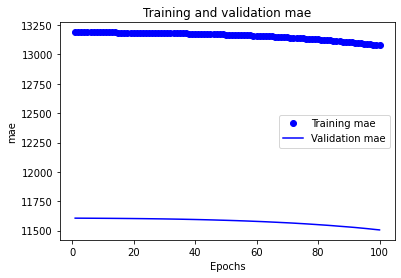

In [100]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [102]:
# Readjusting Model Layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',input_shape=(normed_train_dataset.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [103]:
model = build_model()

In [104]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                4288      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 10,561
Trainable params: 10,561
Non-trainable params: 0
_________________________________________________________________


In [105]:
# Increasing epochs
history = model.fit(normed_train_dataset, train_labels, epochs=1000, validation_split=0.2, verbose=0)

In [106]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
995,155576.781250,223.728363,5830124.5,1813.826782,995
996,159687.718750,216.649750,6082310.5,1872.511719,996
997,149553.953125,221.803940,5927504.0,1848.445801,997
998,154861.703125,215.867249,5820237.0,1824.529907,998
999,148246.000000,204.593445,5863738.0,1825.250000,999


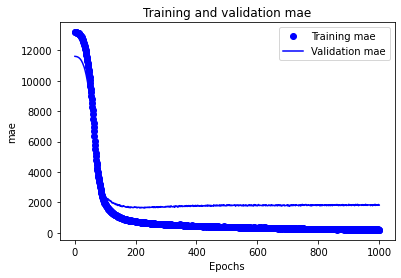

In [107]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

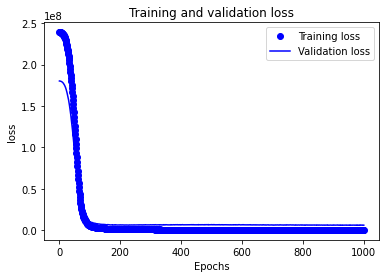

In [108]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [112]:
# Readjusting Model Layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',input_shape=(normed_train_dataset.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [113]:
model = build_model()

In [114]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                4288      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 10,561
Trainable params: 10,561
Non-trainable params: 0
_________________________________________________________________


In [115]:
# Readjusting epochs
history = model.fit(normed_train_dataset, train_labels, epochs=200, validation_split=0.2, verbose=0)

In [116]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
195,1802727.375,987.590088,6241977.5,1737.389771,195
196,1839118.875,993.937988,5992139.0,1683.935425,196
197,1759921.125,971.875183,6015939.5,1683.993408,197
198,1774060.000,963.722168,6151205.0,1715.467651,198
199,1751547.250,974.264526,5913132.0,1662.284912,199


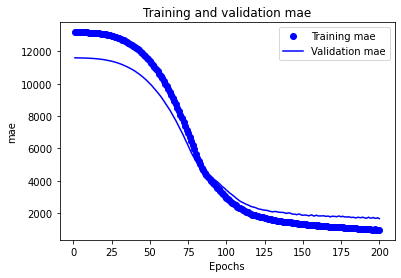

In [117]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

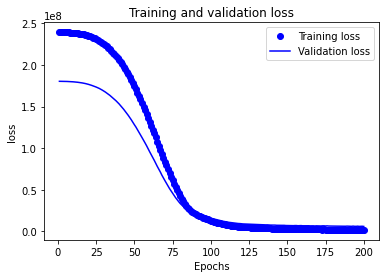

In [118]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [119]:
evaluate = model.evaluate(normed_test_dataset, test_labels, verbose=0)

In [120]:
evaluate

[7590146.0, 1982.738525390625]

In [121]:
test_predictions = model.predict(normed_test_dataset).flatten()

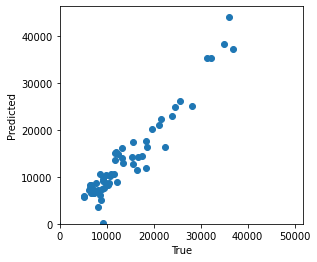

In [122]:
plt.scatter(test_labels, test_predictions)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_=plt.plot([-100,100],[-100,100])

In [123]:
errors = test_predictions - test_labels

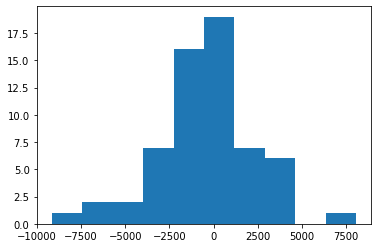

In [124]:
plt.hist(errors)
plt.show()